Create an array of complex number where both real and imaginary range from -2 to 2, exclusive

In [1]:
import numpy as np
import itertools
# define scale size of steps
N = 2
# define steps
dx =  10**(-N)
dy = 10**(-N)
x = np.arange(-2+dx,2,dx)
y = np.arange(-2+dy,2,dy)
# get cartesian product of the two sets
cartesian_product = itertools.product(x,y)
# convert the cartesian product to a list
components_list = [item for item in cartesian_product]
#initialize our complex domain
complex_domain = np.zeros(len(components_list),dtype = "complex")
# term by term, convert each pair of number in the cartesian product into a single complex number
i = 0
for item in components_list:
    complex_domain[i] = np.complex(item[0],item[1])
    i = i + 1

Define an iterative complex function

In [2]:
def get_next_z(z_i,c):
    return z_i**2 + c

Define a function that iterate through the process i times and check for whether it diverges and where it diverges

In [3]:
def iterate_to_z_i(i,c):
    #initialize divergence and divergence point
    diverge = False
    div_point = None
    z = np.zeros(i,dtype = complex)
    z[0] = 0
    for j in range(i-1):
        z[j+1] = get_next_z(z[j], c)
        if np.isnan(z[j+1]): #check whether it is "not a number", this means it diverges
            diverge = True
            div_point = j+1
            break
    return z, diverge, div_point

For each number, c, in the complex domain, go through the iteration formula 30 times. This is enough to see whether the sequence blows through to infinity because after 30 times, the computer cannot handle the number if they diverge.

In [4]:
#create a dictionary that stores the color of a given point in the complex domain
color_dict = {}

# go through the sequence for every number in the complex domain
for c in complex_domain:
    z, diverge, div_point = iterate_to_z_i(30,c)
    if diverge: 
        color_dict[c] = div_point
    else:
        color_dict[c] = 0

c:\users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in cdouble_scalars
  
c:\users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in cdouble_scalars
  


Plot the result in an image

Populating the interactive namespace from numpy and matplotlib


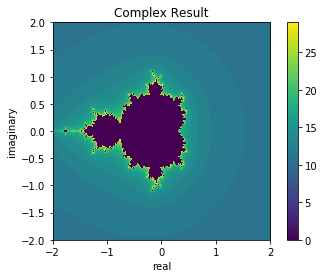

In [5]:
%pylab inline
import matplotlib.pyplot as plt

# create a 2 dimensional array encoding the 2 dimensional graph
xv, yv =  np.meshgrid(x,y)

# define a function that gives the color value of the (real, imaginary) coordinate
def complex_value(x,y):
    z = np.complex(x,y)
    return z

def color(z):
    return color_dict[z]

# initialize final data
data = np.zeros((np.size(x), np.size(y)))
for i in range(np.size(x)):
    for j in range(np.size(y)):
        # for each "pixel" in the final graph, set the color
        data[i][j] = color(complex_value(xv[i][j],yv[i][j]))
#display the data, extent adjusts the scale to the correct -2 to 2
plt.imshow(data, extent = [-2,2,-2,2])
plt.xlabel('real')
plt.ylabel('imaginary')
plt.colorbar()